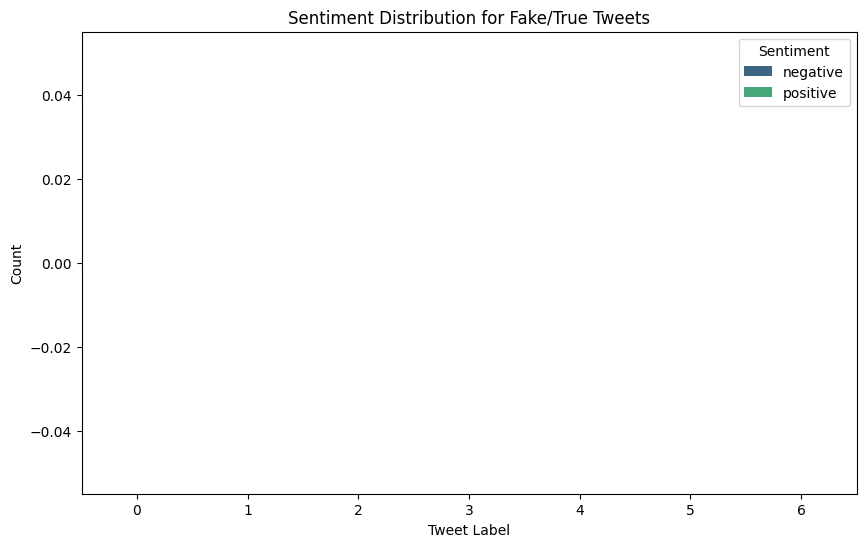


Sentiment Analysis Summary:
Series([], dtype: int64)


In [17]:
##%%
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/Constraint_Train.csv", encoding="utf-8")  # Ensure this file exists and has 'text' and 'label' columns
df["label"] = df["label"].map({0: "true", 1: "fake"})  # Map labels to "true" and "fake"

# Load pre-trained sentiment analysis model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sentiment_model.to(device)
sentiment_model.eval()

# Function to predict sentiment
def predict_sentiment(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = sentiment_model(**inputs)
    pred = torch.argmax(outputs.logits, dim=1).item()
    return "positive" if pred == 1 else "negative"

# Apply sentiment analysis to each tweet
df["sentiment"] = df["tweet"].apply(predict_sentiment)

# Visualize the distribution of sentiments for fake/true tweets
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="label", hue="sentiment", palette="viridis")
plt.title("Sentiment Distribution for Fake/True Tweets")
plt.xlabel("Tweet Label")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

# Optional: Print classification report for sentiment analysis
print("\nSentiment Analysis Summary:")
print(df.groupby(["label", "sentiment"]).size())